# 8. Performing encoding and decoding of images using deep autoencoder.

In [1]:
import keras
from keras import layers
from keras.datasets import mnist
import numpy as np

encoding_dim = 32

# this is our input image
input_img = keras.Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# creating autoencoder model
autoencoder = keras.Model(input_img, decoded)

# create the encoder model
encoder = keras.Model(input_img, encoded)

encoded_input = keras.Input(shape=(encoding_dim,))

# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

# create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# scale and make train and test dataset
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

print(X_train.shape)
print(X_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)


In [2]:
# train autoencoder with training dataset
autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

encoded_imgs = encoder.predict(X_test)
decoded_imgs = decoder.predict(encoded_imgs)

Epoch 1/50
235/235 [==============================] - 9s 30ms/step - loss: 0.2790 - val_loss: 0.1887
Epoch 2/50
235/235 [==============================] - 6s 25ms/step - loss: 0.1700 - val_loss: 0.1547
Epoch 3/50
235/235 [==============================] - 4s 19ms/step - loss: 0.1454 - val_loss: 0.1346
Epoch 4/50
235/235 [==============================] - 6s 24ms/step - loss: 0.1292 - val_loss: 0.1205
Epoch 5/50
235/235 [==============================] - 5s 20ms/step - loss: 0.1165 - val_loss: 0.1105
Epoch 6/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1089 - val_loss: 0.1046
Epoch 7/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1040 - val_loss: 0.1008
Epoch 8/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1007 - val_loss: 0.0980
Epoch 9/50
235/235 [==============================] - 3s 15ms/step - loss: 0.0984 - val_loss: 0.0961
Epoch 10/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0968 - val_lo

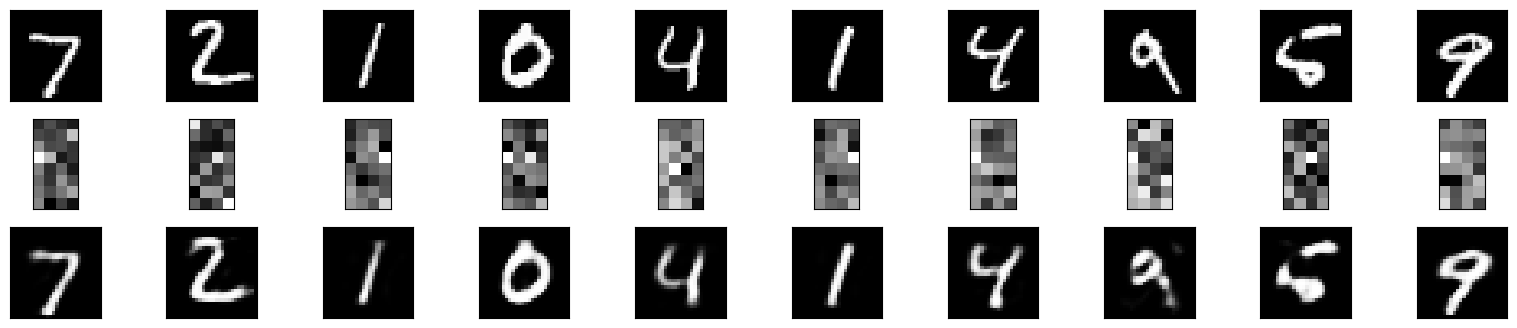

In [3]:
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display encoded image
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs[i].reshape(8, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, 20, 2 * 20 + i + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()